In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("..\A-Machine Learning\Datasets\CSVForDate(1).csv", parse_dates=True)
df = df.drop(columns='Close')
df.columns = ['Open', 'High', 'Low', 'Close']
df

,Open,High,Low,Close
2015-01-01,27485.77,27545.61,27395.34,27507.54
2015-01-02,27521.28,27937.47,27519.26,27887.90
2015-01-05,27978.43,28064.49,27786.85,27842.32
2015-01-06,27694.23,27698.93,26937.06,26987.46
2015-01-07,26983.43,27051.60,26776.12,26908.82
...,...,...,...,...
2020-08-25,38948.46,39008.89,38679.67,38843.88
2020-08-26,38930.18,39111.55,38765.09,39073.92
2020-08-27,39293.53,39326.98,39046.94,39113.47
2020-08-28,39264.48,39579.58,39235.03,39467.31


<AxesSubplot: >

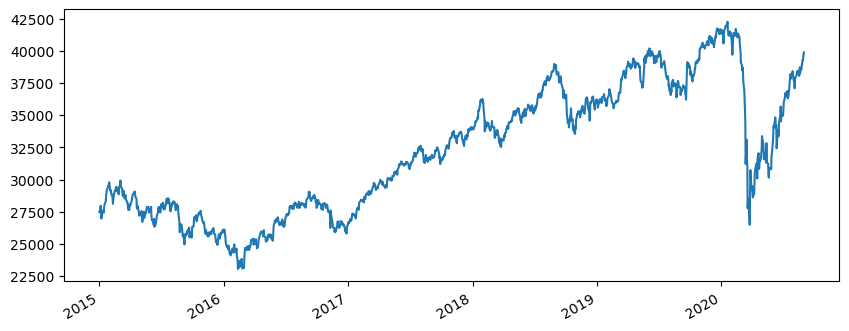

In [4]:
plt.figure(figsize=(10,4))
df['Open'].plot()

<AxesSubplot: >

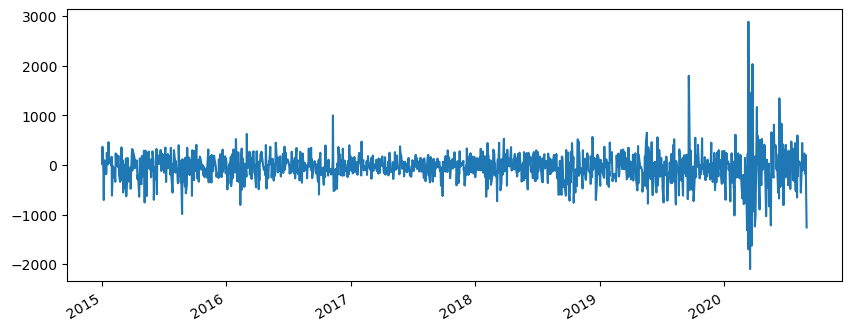

In [5]:
DFD = pd.DataFrame(df['Close'] - df['Open'])
DFD.columns = ['NetMov']
plt.figure(figsize=(10,4))
DFD['NetMov'].plot()

In [6]:
result = adfuller(DFD['NetMov'])
print('ADF Statistic: ',result[0])
print('p-valuse: ',result[1])

ADF Statistic:  -6.6394058968240355
p-valuse:  5.457888548468502e-09


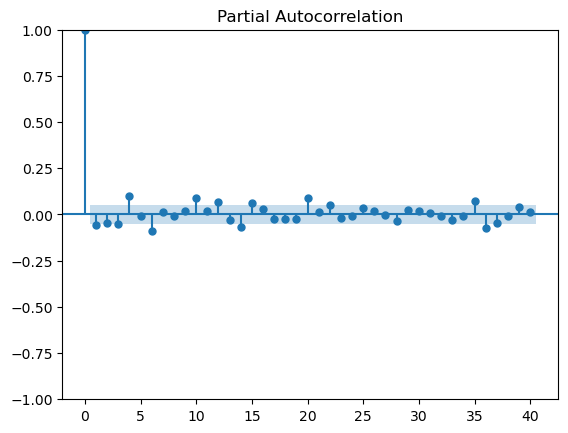

In [7]:
pacf = plot_pacf(DFD['NetMov'], lags=40)

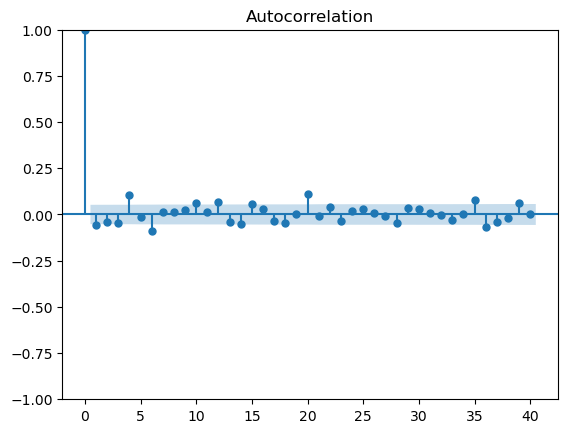

In [8]:
acf = plot_acf(DFD['NetMov'], lags=40)

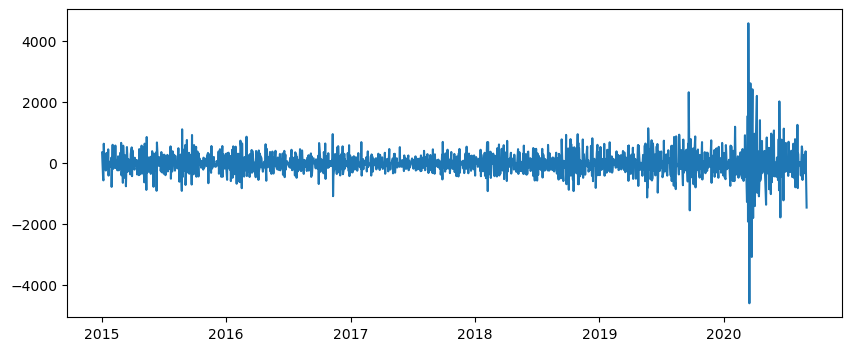

In [9]:
DFDt = DFD['NetMov'].diff()
DFDt = DFDt.dropna()
plt.figure(figsize=(10,4))
plt.plot(DFDt)

In [10]:
result = adfuller(DFDt)
print('ADF Statistic: ',result[0])
print('p-value: ',result[1])

ADF Statistic:  -13.161497641411765
p-value:  1.304552115011943e-24


<Figure size 1000x400 with 0 Axes>

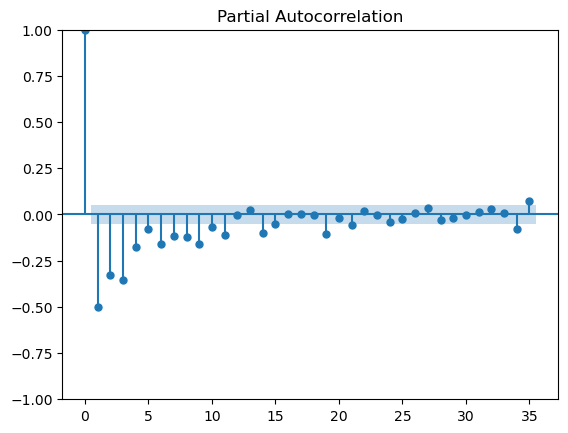

In [12]:
plt.figure(figsize=(10,4))
pacf = plot_pacf(DFDt, lags = 35)

<Figure size 1000x400 with 0 Axes>

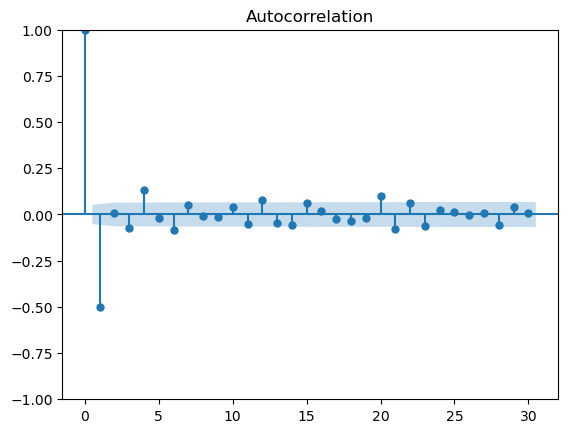

In [13]:
plt.figure(figsize=(10,4))
acf = plot_acf(DFDt, lags = 30)

In [13]:
start_date = pd.to_datetime('2020-01-01', format = '%Y-%m-%d')
end_date = pd.to_datetime('2020-08-31', format = '%Y-%m-%d')
ar_index = DFD.index
DFD_Test = DFD[start_date:]
DFD_Train = DFD[:start_date]
DFD_Train = DFD_Train[:-1]
Test_index = DFD_Test.index
Train_index = DFD_Train.index

In [14]:
print('Test Data Length: ', len(Test_index))
print('Train Data Length: ', len(Train_index))

Test Data Length:  167
Train Data Length:  1234


In [15]:
DFD.index = range(1401)
DFD_Train.index = range(1234)
DFD_Test.index = range(167)

In [156]:
model = ARIMA(DFD_Train, order = (11,1,0))
mdl = model.fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 NetMov   No. Observations:                 1234
Model:                ARIMA(11, 1, 0)   Log Likelihood               -8512.212
Date:                Thu, 18 May 2023   AIC                          17048.425
Time:                        01:22:47   BIC                          17109.831
Sample:                             0   HQIC                         17071.525
                               - 1234                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9370      0.028    -33.623      0.000      -0.992      -0.882
ar.L2         -0.8510      0.036    -23.520      0.000      -0.922      -0.780
ar.L3         -0.7770      0.040    -19.310      0.000      -0.856      -0.698
ar.L4         -0.6630      0.044    -15.013      0.000      -0.750      -0.576
ar.L5         -0.6609      0.047    -14.045      0.000      -0.753      -0.569
ar.L6         -0.5703      0.046    -12.380      0.000      -0.661      -0.480
ar.L7         -0.5194      0.044    -11.759      0.000      -0.606      -0.433
ar.L8         -0.4836      0.044    -11.103      0.000      -0.569      -0.398
ar.L9         -0.3740      0.040     -9.396      0.000      -0.452      -0.296
ar.L10        -0.2344      0.035     -6.640      0.000      -0.304      -0.165
ar.L11        -0.1012      0.026     -3.944      0.000      -0.152      -0.051
sigma2      5.783e+04   1561.255     37.041      0.000    5.48e+04    6.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               847.54
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
pred = mdl.predict(start=0, end=167)
resid = DFD_Test['NetMov']**2 - pred**2

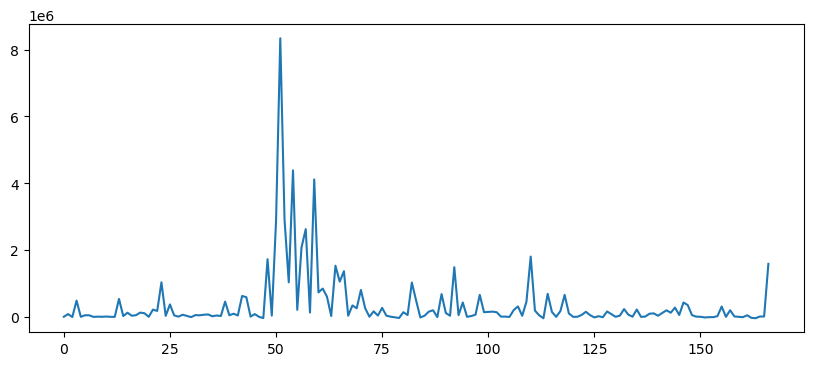

In [158]:
plt.figure(figsize=(10,4))
plt.plot(resid)

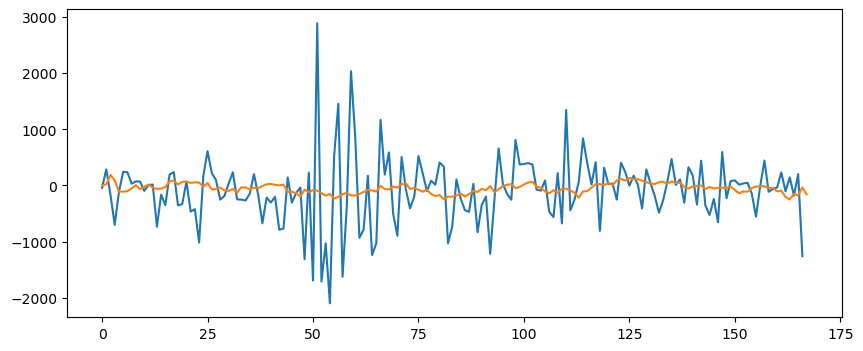

In [159]:
plt.figure(figsize=(10,4))
plt.plot(DFD_Test)
plt.plot(pred)

In [160]:
ar = resid/DFD_Test['NetMov']**2
print('Mean Absolute Precent Error: ',round(np.mean(abs(ar)),4))

Mean Absolute Precent Error:  10.5494


In [161]:
print('Root Mean Squared Error: ',np.mean(resid))

Root Mean Squared Error:  362050.6087167243


In [162]:
ar_index[1234]

Timestamp('2020-01-01 00:00:00')

In [163]:
DFD

,NetMov
0,21.77
1,366.62
2,-136.11
3,-706.77
4,-74.61
...,...
1396,-104.58
1397,143.74
1398,-180.06
1399,202.83


In [164]:
rolling_data = DFD.iloc[:,0]
rolling_pred = np.zeros(167)
a,b = 0,1233

In [165]:
for i in range(167):
    model1 = ARIMA(rolling_data[a+i:b+i],order = (11,1,0))
    mdl1 = model1.fit()
    rolling_pred[i] = mdl1.predict(start=i,end=i)

In [166]:
print(a+i)
print(b+i)

166
1399


In [167]:
DFD_Test.index = Test_index
rolling_pred = pd.DataFrame(rolling_pred)
rolling_pred.index = Test_index

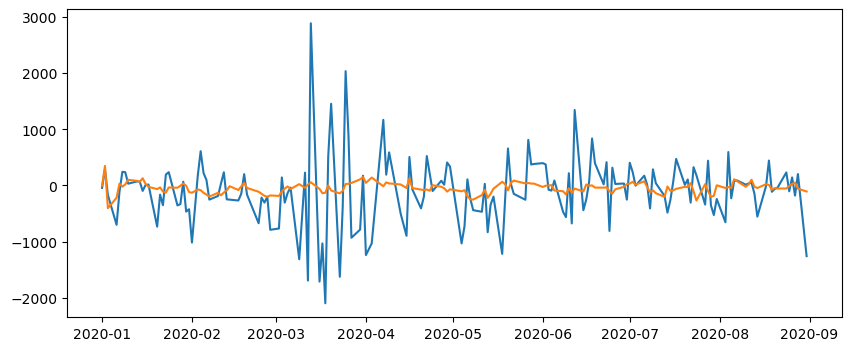

In [168]:
plt.figure(figsize=(10,4))
plt.plot(DFD_Test)
plt.plot(rolling_pred)

In [169]:
DFD_Test.index = range(167)
rolling_pred.index = range(167)

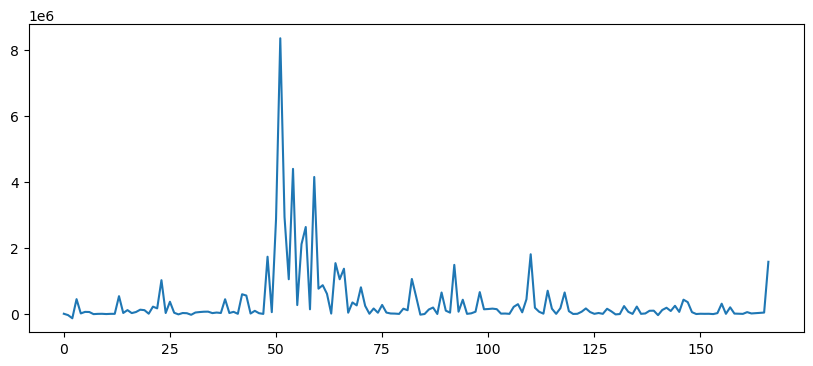

In [170]:
rolling_pred = pd.DataFrame(rolling_pred)
rolling_resid = DFD_Test['NetMov']**2 - rolling_pred[0]**2
plt.figure(figsize=(10,4))
plt.plot(rolling_resid)

In [171]:
ar = rolling_resid/DFD_Test['NetMov']**2
print('Mean Absolute Precent Error: ',round(np.mean(abs(ar)),4))

Mean Absolute Precent Error:  1.5497


In [172]:
print('Root Mean Squared Error: ',np.mean(resid))

Root Mean Squared Error:  362050.6087167243


In [33]:
model = ARIMA(DFD_Train, order = (34,1,0))
mdl = model.fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 NetMov   No. Observations:                 1234
Model:                ARIMA(34, 1, 0)   Log Likelihood               -8476.467
Date:                Wed, 17 May 2023   AIC                          17022.934
Time:                        23:43:19   BIC                          17202.036
Sample:                             0   HQIC                         17090.310
                               - 1234                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9775      0.029    -33.836      0.000      -1.034      -0.921
ar.L2         -0.9463      0.040    -23.818      0.000      -1.024      -0.868
ar.L3         -0.9200      0.048    -19.306      0.000      -1.013      -0.827
ar.L4         -0.8652      0.055    -15.711      0.000      -0.973      -0.757
ar.L5         -0.9102      0.061    -14.812      0.000      -1.031      -0.790
ar.L6         -0.8727      0.067    -12.991      0.000      -1.004      -0.741
ar.L7         -0.8750      0.072    -12.191      0.000      -1.016      -0.734
ar.L8         -0.8841      0.074    -11.912      0.000      -1.030      -0.739
ar.L9         -0.8305      0.077    -10.803      0.000      -0.981      -0.680
ar.L10        -0.7436      0.081     -9.162      0.000      -0.903      -0.585
ar.L11        -0.6627      0.083     -7.971      0.000      -0.826      -0.500
ar.L12        -0.6073      0.085     -7.156      0.000      -0.774      -0.441
ar.L13        -0.5867      0.086     -6.843      0.000      -0.755      -0.419
ar.L14        -0.5712      0.085     -6.727      0.000      -0.738      -0.405
ar.L15        -0.5622      0.087     -6.437      0.000      -0.733      -0.391
ar.L16        -0.5112      0.086     -5.964      0.000      -0.679      -0.343
ar.L17        -0.5192      0.088     -5.932      0.000      -0.691      -0.348
ar.L18        -0.4878      0.088     -5.562      0.000      -0.660      -0.316
ar.L19        -0.4931      0.090     -5.507      0.000      -0.669      -0.318
ar.L20        -0.4390      0.088     -4.967      0.000      -0.612      -0.266
ar.L21        -0.4360      0.085     -5.106      0.000      -0.603      -0.269
ar.L22        -0.3675      0.085     -4.333      0.000      -0.534      -0.201
ar.L23        -0.3394      0.085     -3.982      0.000      -0.506      -0.172
ar.L24        -0.2955      0.083     -3.571      0.000      -0.458      -0.133
ar.L25        -0.2985      0.080     -3.743      0.000      -0.455      -0.142
ar.L26        -0.2372      0.079     -2.997      0.003      -0.392      -0.082
ar.L27        -0.1941      0.076     -2.549      0.011      -0.343      -0.045
ar.L28        -0.2118      0.071     -2.994      0.003      -0.351      -0.073
ar.L29        -0.1483      0.068     -2.191      0.028      -0.281      -0.016
ar.L30        -0.1008      0.063     -1.591      0.112      -0.225       0.023
ar.L31        -0.0310      0.057     -0.546      0.585      -0.142       0.080
ar.L32        -0.0077      0.050     -0.155      0.877      -0.106       0.090
ar.L33         0.0101      0.042      0.241      0.810      -0.072       0.092
ar.L34        -0.0064      0.030     -0.210      0.834      -0.066       0.053
sigma2      5.452e+04   1731.470     31.487      0.000    5.11e+04    5.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               650.30
Prob(Q):                              0.99   Prob(JB):                 

In [89]:
model = ARIMA(DFD_Train, order = (29,1,0))
mdl = model.fit()
pred = mdl.predict(start=0, end=167)
resid = DFD_Test['NetMov']**2 - pred**2

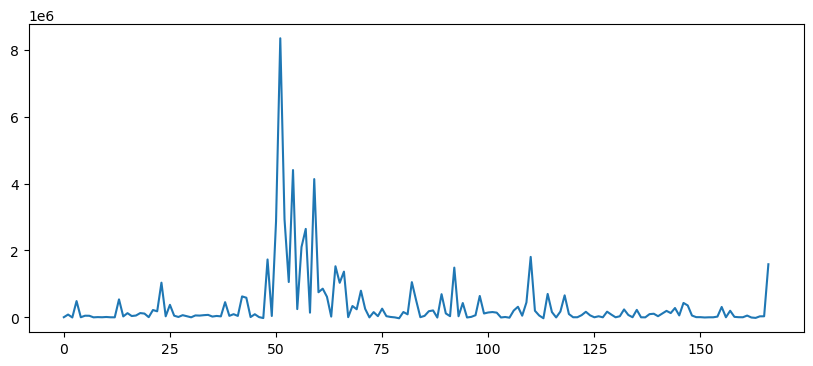

In [90]:
plt.figure(figsize=(10,4))
plt.plot(resid)

In [91]:
DFD_Test.index = Test_index
rolling_pred.index = Test_index

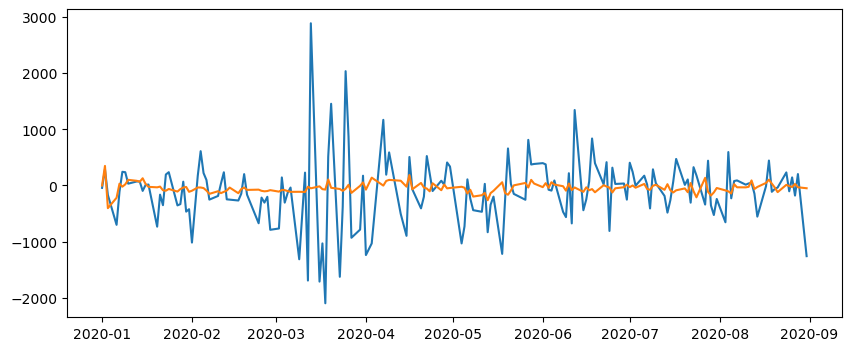

In [92]:
plt.figure(figsize=(10,4))
plt.plot(DFD_Test)
plt.plot(rolling_pred)

In [93]:
DFD_Test.index = range(167)
rolling_pred.index = range(167)

In [94]:
ar = rolling_resid/DFD_Test['NetMov']**2
print('Mean Absolute Precent Error: ',round(np.mean(abs(ar)),4))

Mean Absolute Precent Error:  2.3693


In [95]:
print('Root Mean Squared Error: ',np.mean(resid))

Root Mean Squared Error:  365293.6086163407


In [41]:
rolling_data = DFD.iloc[:,0]
rolling_pred = np.zeros(167)
a,b = 0,1233

In [42]:
for i in range(167):
    model1 = ARIMA(rolling_data[a+i:b+i],order = (25,1,0))
    mdl1 = model1.fit()
    rolling_pred[i] = mdl1.predict(start=i,end=i)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166


In [43]:
print(a+i)
print(b+i)

166
1399


In [44]:
DFD_Test.index = Test_index
rolling_pred = pd.DataFrame(rolling_pred)
rolling_pred.index = Test_index

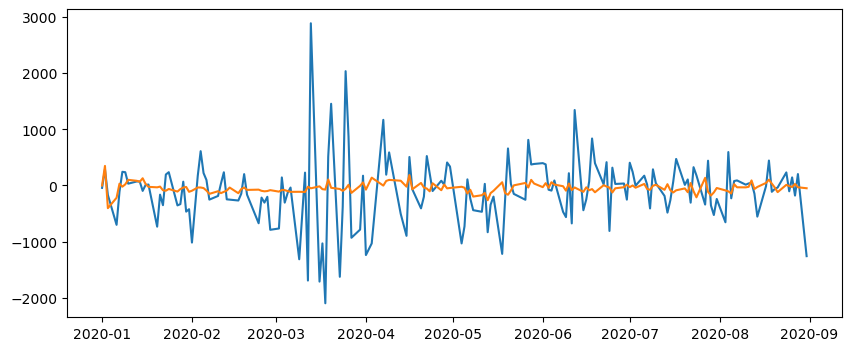

In [45]:
plt.figure(figsize=(10,4))
plt.plot(DFD_Test)
plt.plot(rolling_pred)

In [46]:
DFD_Test.index = range(167)
rolling_pred.index = range(167)

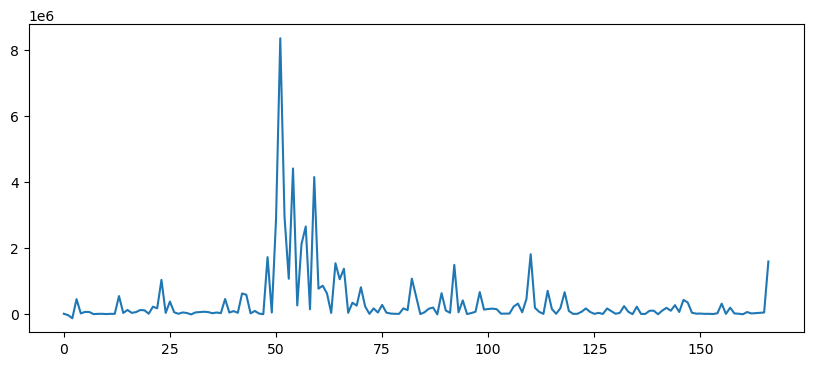

In [47]:
rolling_pred = pd.DataFrame(rolling_pred)
rolling_resid = DFD_Test['NetMov']**2 - rolling_pred[0]**2
plt.figure(figsize=(10,4))
plt.plot(rolling_resid)

In [48]:
ar = rolling_resid/DFD_Test['NetMov']**2
print('Mean Absolute Precent Error: ',round(np.mean(abs(ar)),4))

Mean Absolute Precent Error:  2.3693


In [49]:
print('Root Mean Squared Error: ',np.mean(resid))

Root Mean Squared Error:  365270.4294324346
